<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/CM_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Провести:**
P<sub>n</sub>(x), 

x<sub>k</sub> = 1 + k/n, 

y<sub>k</sub> = y(x), 

k = 0, ..., n

**Графики:**

1) P<sub>n</sub>(x) - y(x)

2) max |P<sub>n</sub>(x) - y(x)| для любого n

3) **N + sin(x)**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [ ]:
#таблица абсцисс и ординат
def f(x):
    return math.cos(x)

a = 0
b = 2
n = 10
k = np.arange(n)
x = np.arange(start = a, stop = b, step = (b-a)/n)
y = np.zeros(n)
for i in k:
  x[i] = 1 + i/n
  y[i] = f(x[i])
table = pd.DataFrame(data={'k': k, 'x': x, 'y': y})

In [ ]:
def coef(x, y):
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])
    return np.array(a) # массив с коэффициентами

#x = [0, 1, 4, 5, 7]
#y = [-1, 1, 1, 6, 5]# значения, которые легко проверить
table = pd.DataFrame(data={'coefficients': coef(x, y)})

In [ ]:
def newton_polynom(a, xk, xAxis):
    y = []
    for x in xAxis:
        result = 0
        for i in range(len(a)):
            temp = a[i]
            for j in range(i):
                temp *= (x - xk[j])
            result += temp
        y.append(result)
    return y

def difference(x, y):
    n = len(x)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            y[i] = (y[i]-y[i-1])/float(x[i]-x[i-j])
    return y

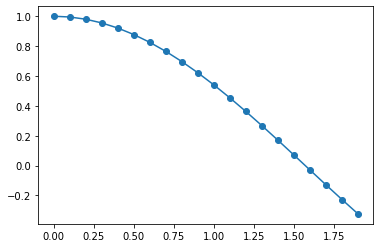

In [ ]:
x_interpolate = np.arange(a, b, (b-a)/n)
y_interpolate = np.cos(x_interpolate)
to_interpolate = np.arange(a, b, 0.1)
interpolated = np.cos(to_interpolate)
polynom = np.array(newton_polynom(difference(x_interpolate, y_interpolate), x_interpolate, to_interpolate))
plt.scatter(to_interpolate, polynom)
plt.plot(to_interpolate, interpolated)
plt.show()

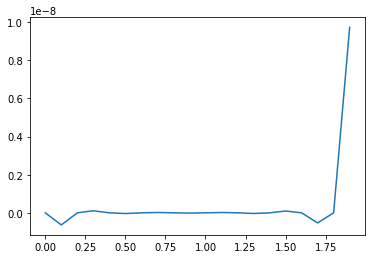

In [ ]:
plt.plot(to_interpolate, polynom - interpolated)
plt.show()

<function matplotlib.pyplot.show>

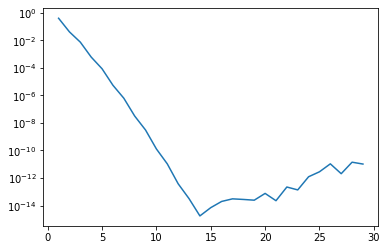

In [ ]:
start = 1
end = 30
yMax = []
y_interpolate = np.array([])
to_interpolate = np.arange(a, b, 0.001)
xaxis = np.arange(start, end)
for n in range (start, end):
  xk = np.linspace(a, b, n + 1)
  y_interpolate = np.sin(xk)
  yaxis = np.sin(to_interpolate)
  polynom = np.array(newton_polynom(difference(xk, y_interpolate), xk, to_interpolate))
  yMax.append(max(abs(polynom - yaxis)))
plt.semilogy(xaxis, yMax)
plt.show